# Support Vector Classifier for Optical Recognition of Handwriting Digits Using Python

###### Even though the United States Postal Service, as an organization, was formed in 1971, it traces its roots back to the Post Office Department, an organization formed in 1792 by Benjamin Franklin. It later evolved into a cabinet-level department in 1872, before finally being transformed into the USPS we know today in 1971, as an agency of the U.S. government.

Back in the day, all mail was hand read and delivered. Even up the turn of the 20th century, antiquated techniques such as the pigeonhole method from colonial times were used for mail-handling. During the 1950's, the post office started intense research on the coding systems used in many other countries and started down the process of automation. In 1982, the first computer-driven, OCR machine got installed in Los Angeles, and by the end of 1984, over 250 OCRs machines were installed in 118 major mail processing centers across the country and were processing an average of 6,200 pieces of mail per hour.

Nowadays, the Postal Service is one of the world leaders in optical character recognition technology with machines reading nearly +98 percent of all hand-addressed letter mail and +99.5 percent of machine-printed mail, with a single tray sorting machines capable of sorting more than 18 million trays of mail per day.

Let's see if it is possible for you to train a support vector classifier on your computer in a few seconds using machine learning, and if your classification accuracy is similar or better than the advertised USPS stats. For this lab, you'll be making use of the Optical Recognition of Handwritten Digits dataset, provided courtesy of UCI's Machine Learning Repository.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import svm

import math

The dataset used in this lab comes from https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


### Convenience Functions

In [2]:
def load(path_train, path_test):
    # Load up the data.
    
    
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same.
    n_features = testing.shape[1]

    X_test  = testing.ix[:,:n_features-1]
    X_train = training.ix[:,:n_features-1]
    y_test  = testing.ix[:,n_features-1:].values.ravel()
    y_train = training.ix[:,n_features-1:].values.ravel()

   
    return X_train, X_test, y_train, y_test

In [3]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    num_rows = 10
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            plt.subplot(num_cols, num_rows, index + 1)

            # 8x8 is the size of the image, 64 pixels
            plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
            plt.axis('off')
            index += 1
    plt.show()

### The Assignment

In [4]:
# Pass in the file paths to the .tra and the .tes files:
X_train, X_test, y_train, y_test = load('Datasets\optdigits.tra', 'Datasets\optdigits.tes')

Get to know your data. It seems its already well organized in `[n_samples, n_features]` form. Your dataset looks like (4389, 784). Also your labels are already shaped as `[n_samples]`.

In [5]:
X_train.head(5)

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.20,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25
0,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
3,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
4,0,0,11,16,10,1,0,0,0,4,...,8,3,0,0,10,16,16,16,16,6


Create an SVC classifier. Leave `C=1`, but set `gamma` to `0.001` and set the `kernel` to `linear`. Then train the model on the training data and labels:

In [6]:
print("Training SVC Classifier...")

# .. your code here ..
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma=0.001)
model.fit(X_train, y_train)

Training SVC Classifier...


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Calculate the score of your SVC against the testing data:

In [7]:
print("Scoring SVC Classifier...")

# .. your code here ..
score = model.score(X_test, y_test)

print("Score:\n", score)

Scoring SVC Classifier...
Score:
 0.982739420935


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


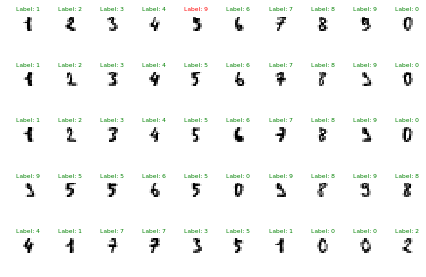

In [8]:
# Let's get some visual confirmation of accuracy:
drawPredictions(X_train, X_test, y_train, y_test)

Print out the TRUE value of the 1000th digit in the test set. By TRUE value, we mean, the actual provided, ground-truth label for that sample:

In [9]:
true_1000th_test_value = y_test[999]
print("1000th test label: ", true_1000th_test_value)

1000th test label:  1


Predict the value of the 1000th digit in the test set. Was your model's prediction correct? If you get a warning on your predict line, look at the notes from the previous module's labs.

In [10]:
pred = model.predict(X_test)
guess_1000th_test_value = pred[999]
print("1000th test prediction: ", guess_1000th_test_value)

1000th test prediction:  1


Use `imshow()` to display the 1000th test image, so you can visually check if it was a hard image, or an easy image:

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


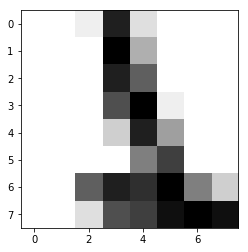

In [11]:
plt.imshow(X_test.ix[999, :].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

### Conclusion

Our SVC classifier, named here as "model", is scored at 98.27% accuracy. This is similar to the USPS's published stats.